In [ ]:
#import ario3.mriosystem as mrio_sys
import pathlib
import numpy as np
import pymrio as pym
import pandas as pd
import pickle

params = { "storage_dir": "BigScaleTest",
            "results_storage": "results",
            "bool_run_detailled": True,
            "register_stocks": True,
            "psi_param": 0.8,
            "model_time_step": 1,
            "timestep_dividing_factor": 100,
            "inventory_restoration_time": 30,
            "alpha_base": 1.0,
            "alpha_max": 1.25,
            "alpha_tau": 100,
            "rebuild_tau": 30,
            "n_timesteps": 365,
            "min_duration": (365 // 100) * 25,
            "impacted_region_base_production_toward_rebuilding": 0.005,
            "row_base_production_toward_rebuilding": 0.0,
            "mrio_params_file":"/home/sjuhel/Nextcloud/Thesis/Workbench/Code/ARIO3/BigScaleTest/mrio_params.json"
}


In [ ]:
exio3 = pym.parse_exiobase3(path='./../../../Data/IOT_2019_ixi.zip')


In [2]:
print(exio_meta)

Description: EXIOBASE3 metadata file for pymrio
MRIO Name: EXIO3
System: ixi
Version: 10.5281/zenodo.3583070
File: ../../../Data/Données_SocioEco/Tableaux/EXIO_TABLES/metadata.json
History:
20220214 14:28:38 - FILEIO -  Downloaded https://zenodo.org/record/5589597/files/IOT_2011_ixi.zip to IOT_2011_ixi.zip


In [ ]:
np.unique(exio3.get_sectors())

In [91]:
sec_agg_matrix = pd.read_excel("./../../../Data/Données_SocioEco/Tableaux/aggreg EXIO.ods", sheet_name="input", engine="odf", header=None).to_numpy()
sec_agg_matrix.shape

(75, 163)

In [ ]:
exio3.aggregate(sector_agg=sec_agg_matrix)
exio3.rename_sectors(
    {
    "sec0": "Cultivation in general",
    "sec1": "Animal farming",
    "sec2": "Milk, Animal products nec",
    "sec3": "Wool, silk-worm cocoons",
    "sec4": "Manure treatment, storage and land application",
    "sec5": "Forestry, logging and related service activities (02)",
    "sec6": "Fishing, operating of fish hatcheries and fish farms; service activities incidental to fishing (05)",
    "sec7": "Mining of coal and lignite; extraction of peat (10)",
    "sec8": "Extraction of crude petroleum, gas and other",
    "sec9": "Mining of uranium and thorium ores (12)",
    "sec10": "Mining of iron ores",
    "sec11": "Mining of copper ores and concentrates",
    "sec12": "Mining of nickel ores and concentrates",
    "sec13": "Mining of aluminium ores and concentrates",
    "sec14": "Mining of precious metal ores and concentrates",
    "sec15": "Mining of lead, zinc and tin ores and concentrates",
    "sec16": "Mining of other non-ferrous metal ores and concentrates",
    "sec17": "Quarrying",
    "sec18": "Processing of meat products",
    "sec19": "Processing of food products nec",
    "sec20": "Manufacture of tobacco products (16)",
    "sec21": "Manufacture of textile and wearing apparel (17,18)",
    "sec22": "Manufacture of wood and of products of wood and cork, except furniture; manufacture of articles of straw and plaiting materials (20)",
    "sec23": "Paper",
    "sec24": "Publishing, printing and reproduction of recorded media (22)",
    "sec25": "Manufacture of coke oven products",
    "sec26": "Petroleum Refinery",
    "sec27": "Processing of nuclear fuel",
    "sec28": "Plastics, basic",
    "sec29": "Fertilisers",
    "sec30": "Chemicals nec",
    "sec31": "Manufacture of rubber and plastic products (25)",
    "sec32": "Manufacture of glass and glass products",
    "sec33": "Manufacture of ceramic goods",
    "sec34": "Manufacture of construction products and cement",
    "sec35": "Manufacture of other non-metallic mineral products n.e.c.",
    "sec36": "Manufacture of basic iron and steel and of ferro-alloys and first products thereof",
    "sec37": "Precious metals production",
    "sec38": "Aluminium production",
    "sec39": "Lead, zinc and tin production",
    "sec40": "Copper production",
    "sec41": "Other non-ferrous metal production",
    "sec42": "Casting of metals",
    "sec43": "Manufacture of fabricated metal products, except machinery and equipment (28)",
    "sec44": "Manufacture of machinery and equipment n.e.c. (29)",
    "sec45": "Manufacture of office machinery and computers (30)",
    "sec46": "Manufacture of electrical machinery and apparatus n.e.c. (31)",
    "sec47": "Manufacture of medical, precision and optical instruments, watches and clocks (33)",
    "sec48": "Manufacture of transport equipment (34,35)",
    "sec49": "Manufacture of furniture; manufacturing n.e.c. (36)",
    "sec50": "Recycling of waste and scrap",
    "sec51": "Production of electricity",
    "sec52": "Transmission and distribution of electricity",
    "sec53": "Manufacture of gas; distribution of gaseous fuels through mains",
    "sec54": "Collection, purification and distribution of water (41)",
    "sec55": "Construction (45)",
    "sec56": "Sale, maintenance, repair of motor vehicles, motor vehicles parts, motorcycles, motor cycles parts and accessoiries",
    "sec57": "Retail sale of automotive fuel",
    "sec58": "Wholesale trade and commission trade, except of motor vehicles and motorcycles (51)",
    "sec59": "Retail trade, except of motor vehicles and motorcycles; repair of personal and household goods (52)",
    "sec60": "Hotels and restaurants (55)",
    "sec61": "Transport via railways",
    "sec62": "Other land transport",
    "sec63": "Transport via pipelines",
    "sec64": "Sea and coastal water transport",
    "sec65": "Inland water transport",
    "sec66": "Air transport (62)",
    "sec67": "Supporting and auxiliary transport activities; activities of travel agencies (63)",
    "sec68": "Post and telecommunications (64)",
    "sec69": "Financial intermediation, insurance and pension funding (65)",
    "sec70": "Renting of machinery and equipment without operator and of personal and household goods (71)",
    "sec71": "Other business activities (74)",
    "sec72": "Public administration and defence; compulsory social security, Education and Health (75,80,85)",
    "sec73": "Waste disposal",
    "sec74": "Other (91,92,93,95)"
    }
)

exio3.calc_all()

In [ ]:
import pickle as pkl
import datetime
with open("./../../../Data/Données_SocioEco/Tableaux/exio_ixi_2019_"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+".pkl", 'wb') as f:
	pkl.dump(exio3, f)

In [ ]:
exio3.get_sectors()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,25))
plt.imshow(exio3.A, vmax=1E-3)
plt.xlabel('Countries - sectors')
plt.ylabel('Countries - sectors')
plt.show()

In [93]:
import json
params = { 
            "results_storage": "results",
            "bool_run_detailled": True,
            "register_stocks": True,
            "psi_param": 0.9,
            "model_time_step": 1,
            "timestep_dividing_factor": 100,
            "inventory_restoration_time": 40,
            "alpha_base": 1.0,
            "alpha_max": 1.25,
            "alpha_tau": 365,
            "rebuild_tau": 90,
            "n_timesteps": 100,
            "min_duration": 25,
            "impacted_region_base_production_toward_rebuilding": 0.002,
            "row_base_production_toward_rebuilding": 0.0,
            "mrio_params_file":"/home/sjuhel/Nextcloud/Thesis/Workbench/Data/BigScaleTest/mrio_params.json"
}

event_template = {
        "aff-regions": [
            "FR"
        ],
        "aff-sectors": [
            'Mining of coal and lignite; extraction of peat (10)',
            'Extraction of crude petroleum and services related to crude oil extraction, excluding surveying',
            'Extraction of natural gas and services related to natural gas extraction, excluding surveying',
            'Extraction, liquefaction, and regasification of other petroleum and gaseous materials',
            'Mining of uranium and thorium ores (12)',
            'Mining of iron ores',
            'Mining of copper ores and concentrates',
            'Mining of nickel ores and concentrates',
            'Mining of aluminium ores and concentrates',
            'Mining of precious metal ores and concentrates',
            'Mining of lead, zinc and tin ores and concentrates',
            'Mining of other non-ferrous metal ores and concentrates', 
            'Quarrying',
            'Manufacture of textiles (17)',
            'Manufacture of wearing apparel; dressing and dyeing of fur (18)',
            'Manufacture of wood and of products of wood and cork, except furniture; manufacture of articles of straw and plaiting materials (20)',
            'Manufacture of coke oven products',
            'Petroleum Refinery',
            'Processing of nuclear fuel',
            'Plastics, basic',
            'Fertilisers',
            'Chemicals nec',
            'Manufacture of rubber and plastic products (25)',
            'Manufacture of glass and glass products',
            'Manufacture of ceramic goods',
            'Manufacture of construction products and cement',
            'Manufacture of other non-metallic mineral products n.e.c.',
            'Manufacture of basic iron and steel and of ferro-alloys and first products thereof',
            'Precious metals production', 
            'Aluminium production',
            'Lead, zinc and tin production', 
            'Copper production',
            'Other non-ferrous metal production',
            'Casting of metals',
            'Manufacture of fabricated metal products, except machinery and equipment (28)',
            'Manufacture of machinery and equipment n.e.c. (29)',
            'Manufacture of office machinery and computers (30)',
            'Manufacture of electrical machinery and apparatus n.e.c. (31)',
            'Manufacture of medical, precision and optical instruments, watches and clocks (33)',
            'Manufacture of transport equipment (34,35)',
            'Manufacture of furniture; manufacturing n.e.c. (36)',
            'Recycling of waste and scrap',
            'Transmission and distribution of electricity',
            'Transport via railways',
            'Other land transport',
            'Post and telecommunications (64)'
        ],
        "dmg-distrib-regions": [
            1
        ],
        "dmg-distrib-sectors-type": "gdp",
        "dmg-distrib-sectors": [],
        "duration": 1,
        "name": "0",
        "occur": 5,
        "q_dmg": 100000000,
        "rebuilding-sectors": {
            'Public administration and defence; compulsory social security (75)':0.24, # public services
            "Construction (45)":0.24,
            'Manufacture of wood and of products of wood and cork, except furniture; manufacture of articles of straw and plaiting materials (20)':0.05,
            'Manufacture of construction products and cement':0.05,
            "Manufacture of office machinery and computers (30)": 0.023,
            'Other land transport':0.046,
            'Manufacture of electrical machinery and apparatus n.e.c. (31)':0.08,
            'Financial intermediation, insurance and pension funding (65)':0.024, # real estate
            "Manufacture of furniture; manufacturing n.e.c. (36)" : 0.06,
            'Manufacture of textiles (17)': 0.006,
            'Manufacture of wearing apparel; dressing and dyeing of fur (18)':0.005,
            "Manufacture of machinery and equipment n.e.c. (29)" : 0.01,
            'Chemicals nec': 0.005,
            'Retail sale of automotive fuel': 0.005,
            'Processing of food products nec': 0.003,
            'Manufacture of ceramic goods':0.0009,
            "Manufacture of medical, precision and optical instruments, watches and clocks (33)": 0.002,
            "Cultivation nec": 0.00005,
            "Animal farming": 0.00005,                      
            "Sale, maintenance, repair of motor vehicles, motor vehicles parts, motorcycles, motor cycles parts and accessoiries": 0.05,
            "Retail trade, except of motor vehicles and motorcycles; repair of personal and household goods (52)" : 0.05,
            "Wholesale trade and commission trade, except of motor vehicles and motorcycles (51)": 0.05
        }
    }



with pathlib.Path("../other/params_test_"+datetime.datetime.now().strftime("%Y%m%d")+".json").open('w') as f:
    json.dump(params, f, indent=4)
    
with pathlib.Path("../other/event_test_"+datetime.datetime.now().strftime("%Y%m%d")+".json").open('w') as f:
    json.dump(event_template, f, indent=4)

In [ ]:
display(exio3.unit)
display(exio3.x.query("""region == 'FR' & sector=='Cultivation of wheat' """)*1000000)

In [ ]:
import pandas as pd
data = {"Building damage" : 4300000000,
        "Furniture damage" :4000000000,
        "Industrial equipment damage" : 500000000,
        "Industrial product damage" : 400000000,
        "Shop and company equipment damage" : 1000000000,
        "Shop and company product damage": 140000000,
        "Agricultural machine damage": 1700000,
        "Agricultural product damage" :770000,
        "public facility damage" :7000000000
       }

data_2 = {"type": [k for k,v in data.items()], "value": [v for k,v in data.items()]}

df = pd.DataFrame.from_dict(data_2)
df = df.set_index("type")

In [ ]:
df['pct'] = df['value'] / df['value'].sum()


In [ ]:
df['construction'] = 0
df['Lumber, wood products'] = 0
df['Electronic component'] = 0
df['Transportation'] = 0
df['Communication and electronic component'] = 0
df['General machinery'] = 0
df['Electrical machinery'] = 0
df['Information, communication machinery'] = 0
df['Office supply'] = 0
df['Clothing and textile'] = 0
df['Chemical products'] = 0
df['Petroleum and coal'] = 0
df['Ceramic stone and clay'] = 0
df['Food products and beverages'] = 0
df['Trading'] = 0
df['Other manufacturing'] = 0
df['Agricultural'] = 0
df['Livestock'] = 0
df['Public work'] = 0
df.columns

In [ ]:
df.loc["Building damage","construction"] = 0.9
df.loc["Building damage","real estate"] = 0.1

df.loc["Furniture damage","Lumber, wood products"] = 0.4
df.loc["Furniture damage","Electronic component"] = 0.3
df.loc["Furniture damage","Transportation"] = 0.2
df.loc["Furniture damage","Communication and electronic component"] = 0.1

df.loc["Industrial equipment damage","General machinery"] = 0.3
df.loc["Industrial equipment damage","Electrical machinery"] = 0.3
df.loc["Industrial equipment damage","Information, communication machinery"] = 0.3
df.loc["Industrial equipment damage","Office supply"] = 0.1

df.loc["Industrial product damage","Clothing and textile"] = 0.3
df.loc["Industrial product damage","Chemical products"] = 0.3
df.loc["Industrial product damage","Petroleum and coal"] = 0.3
df.loc["Industrial product damage","Ceramic stone and clay"] = 0.1

df.loc["Shop and company equipment damage","Lumber, wood products"] = 0.4
df.loc["Shop and company equipment damage","Electrical machinery"] = 0.4
df.loc["Shop and company equipment damage","Office supply"] = 0.2

df.loc["Shop and company product damage","Food products and beverages"] = 0.4
df.loc["Shop and company product damage","Clothing and textile"] = 0.4
df.loc["Shop and company product damage","Trading"] = 0.2

df.loc["Agricultural machine damage","General machinery"] = 0.4
df.loc["Agricultural machine damage","Information, communication machinery"] = 0.3
df.loc["Agricultural machine damage","Other manufacturing"] = 0.3

df.loc["Agricultural product damage","Agricultural"] = 0.4
df.loc["Agricultural product damage","Livestock"] = 0.4
df.loc["Agricultural product damage","Food products and beverages"] = 0.2

df.loc["public facility damage","Public work"] = 1.0
df

In [ ]:
df.loc[:,"construction":] = df.loc[:,"construction":].apply(lambda col : col*df['pct'], axis=0)
df

In [ ]:
tmp = df.sum()
tmp.iloc[2:].sort_values()

In [ ]:
rebuilding_sectors= {
            'Public administration and defence; compulsory social security (75)':0.24, # public services
            "Construction (45)":0.24,
            'Manufacture of wood and of products of wood and cork, except furniture; manufacture of articles of straw and plaiting materials (20)':0.05,
            'Manufacture of construction products and cement':0.05,
            "Manufacture of office machinery and computers (30)": 0.023,
            'Other land transport':0.046,
            'Manufacture of electrical machinery and apparatus n.e.c. (31)':0.08,
            'Financial intermediation, insurance and pension funding (65)':0.024, # real estate
            "Manufacture of furniture; manufacturing n.e.c. (36)" : 0.06,
            'Manufacture of textiles (17)': 0.006,
            'Manufacture of wearing apparel; dressing and dyeing of fur (18)':0.005,
            "Manufacture of machinery and equipment n.e.c. (29)" : 0.01,
            'Chemicals nec': 0.005,
            'Retail sale of automotive fuel': 0.005,
            'Processing of food products nec': 0.003,
            'Manufacture of ceramic goods':0.0009,
            "Manufacture of medical, precision and optical instruments, watches and clocks (33)": 0.002,
            "Cultivation nec": 0.00005,
            "Animal farming": 0.00005,                      
            "Sale, maintenance, repair of motor vehicles, motor vehicles parts, motorcycles, motor cycles parts and accessoiries": 0.05,
            "Retail trade, except of motor vehicles and motorcycles; repair of personal and household goods (52)" : 0.05,
            "Wholesale trade and commission trade, except of motor vehicles and motorcycles (51)": 0.05
        }

l = list(rebuilding_sectors.values())
a = np.array(l)
a.sum()

In [6]:
### JAPAN TEST
import country_converter as coco
import pymrio as pym
exio3_folder = "./../../../Data/Données_SocioEco/Tableaux/EXIO_TABLES/"
exio_meta = pym.download_exiobase3(
    storage_folder=exio3_folder, system="ixi", years=[2011]
)




NameError: name 'io' is not defined

In [9]:
#import ario3.mriosystem as mrio_sys
import pathlib
import pymrio as pym
import pandas as pd
import pickle as pkl
import logging
import sys
import datetime
import argparse
import json

def aggreg(exio3, aggreg_path, sectors_name_path, save_path=None, reg):
    rootLogger.info("Computing the IO components")
    exio3.calc_all()
    rootLogger.info("Done")
    rootLogger.info("Reading aggregation matrix from sheet 'input' in file {}".format(pathlib.Path(aggreg_path).absolute()))
    sec_agg_matrix = pd.read_excel(aggreg_path, sheet_name="input", engine="odf", header=None).to_numpy()
    rootLogger.info("Aggregating from {} to {} sectors".format(len(exio3.get_sectors()), sec_agg_matrix.shape[0]))
    exio3.aggregate(sector_agg=sec_agg_matrix)
    rootLogger.info("Done")
    rootLogger.info("Renaming sectors from {}".format(pathlib.Path(sectors_name_path).absolute()))
    with pathlib.Path(sectors_name_path).open('r') as f:
        a = json.load(f)
    exio3.rename_sectors(a)
    rootLogger.info("Done")
    name = save_path+"_"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+".pkl"
    rootLogger.info("Saving to {}".format(pathlib.Path(name).absolute()))
    with open(name, 'wb') as f:
        pkl.dump(exio3, f)

exio3 = pym.parse_exiobase3(path='./../../../Data/Données_SocioEco/Tableaux/EXIO_TABLES/IOT_2011_ixi.zip')

aggreg(exio3, "./../other/aggreg EXIO.ods", "./../other/exio3_aggreg_sectors_20220202-102727.json")

KeyboardInterrupt: 

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ario3.simulation import Simulation
from ario3.indicators import Indicators
import json
import pandas as pd
import numpy as np
import pathlib
import csv

params = {
    "results_storage": "results",
    "bool_run_detailled": True,
    "register_stocks": True,
    "psi_param": 0.85,
    "model_time_step": 1,
    "timestep_dividing_factor": 365,
    "inventory_restoration_time": 60,
    "alpha_base": 1.0,
    "alpha_max": 1.25,
    "alpha_tau": 365,
    "rebuild_tau": 10000,
    "n_timesteps": 600,
    "min_duration": 25,
    "impacted_region_base_production_toward_rebuilding": 0.001,
    "row_base_production_toward_rebuilding": 0.0,
    "mrio_params_file": "/home/sjuhel/Nextcloud/Thesis/Workbench/Data/BigScaleTest/mrio_params.json",
    "storage_dir": "../../Data/BigScaleTest/"
}

event = {
    "aff-regions": [
        "JP"
    ],
    "aff-sectors": [
        "Mining of coal and lignite; extraction of peat (10)",
        "Extraction of crude petroleum, gas and other",
        "Mining of uranium and thorium ores (12)",
        "Mining of iron ores",
        "Mining of copper ores and concentrates",
        "Mining of nickel ores and concentrates",
        "Mining of aluminium ores and concentrates",
        "Mining of precious metal ores and concentrates",
        "Mining of lead, zinc and tin ores and concentrates",
        "Mining of other non-ferrous metal ores and concentrates",
        "Quarrying",
        "Manufacture of textile and wearing apparel (17,18)",
        "Manufacture of wood and of products of wood and cork, except furniture; manufacture of articles of straw and plaiting materials (20)",
        "Manufacture of coke oven products",
        "Petroleum Refinery",
        "Processing of nuclear fuel",
        "Plastics, basic",
        "Fertilisers",
        "Chemicals nec",
        "Manufacture of rubber and plastic products (25)",
        "Manufacture of glass and glass products",
        "Manufacture of ceramic goods",
        "Manufacture of construction products and cement",
        "Manufacture of other non-metallic mineral products n.e.c.",
        "Manufacture of basic iron and steel and of ferro-alloys and first products thereof",
        "Precious metals production",
        "Aluminium production",
        "Lead, zinc and tin production",
        "Copper production",
        "Other non-ferrous metal production",
        "Casting of metals",
        "Manufacture of fabricated metal products, except machinery and equipment (28)",
        "Manufacture of machinery and equipment n.e.c. (29)",
        "Manufacture of office machinery and computers (30)",
        "Manufacture of electrical machinery and apparatus n.e.c. (31)",
        "Manufacture of medical, precision and optical instruments, watches and clocks (33)",
        "Manufacture of transport equipment (34,35)",
        "Manufacture of furniture; manufacturing n.e.c. (36)",
        "Recycling of waste and scrap",
        "Transmission and distribution of electricity",
        "Transport via railways",
        "Other land transport",
        "Post and telecommunications (64)"
    ],
    "dmg-distrib-regions": [
        1
    ],
    "dmg-distrib-sectors-type": "gdp",
    "dmg-distrib-sectors": [],
    "duration": 1,
    "name": "0",
    "occur": 5,
    "q_dmg": 25000000000,
    "rebuilding-sectors": {
        "Public administration and defence; compulsory social security, Education and Health (75,80,85)": 0.24,
        "Construction (45)": 0.24,
        "Manufacture of wood and of products of wood and cork, except furniture; manufacture of articles of straw and plaiting materials (20)": 0.05,
        "Manufacture of construction products and cement": 0.05,
        "Manufacture of office machinery and computers (30)": 0.023,
        "Other land transport": 0.046,
        "Manufacture of electrical machinery and apparatus n.e.c. (31)": 0.08,
        "Financial intermediation, insurance and pension funding (65)": 0.024,
        "Manufacture of furniture; manufacturing n.e.c. (36)": 0.06,
        "Manufacture of textile and wearing apparel (17,18)": 0.011,
        "Manufacture of machinery and equipment n.e.c. (29)": 0.01,
        "Chemicals nec": 0.005,
        "Retail sale of automotive fuel": 0.005,
        "Processing of food products nec": 0.003,
        "Manufacture of ceramic goods": 0.0009,
        "Manufacture of medical, precision and optical instruments, watches and clocks (33)": 0.002,
        "Cultivation in general": 5e-05,
        "Animal farming": 5e-05,
        "Sale, maintenance, repair of motor vehicles, motor vehicles parts, motorcycles, motor cycles parts and accessoiries": 0.05,
        "Retail trade, except of motor vehicles and motorcycles; repair of personal and household goods (52)": 0.05,
        "Wholesale trade and commission trade, except of motor vehicles and motorcycles (51)": 0.05
    }
}
#"../../Data/BigScaleTest/mrio.pkl" "other/params_test_20220202.json" "other/event_test_20220202.json" "../../Data/BigScaleTest/"

mrio_path = pathlib.Path("../../../Data/")

In [2]:
model = Simulation(params, mrio_path)
model.read_events_from_list([event])
model.shock(model.events[0])

10:40:49 [INFO] - [simulation.py > __init__() > 57] - Initializing new simulation instance
10:40:50 [DEBUG] - [mriosystem.py > __init__() > 124] - Initiating new MrioSystem instance
10:40:50 [INFO] - [mriosystem.py > __init__() > 142] - Monetary unit is: 1000000
10:40:50 [INFO] - [simulation.py > __init__() > 130] - Initialized !
10:40:50 [INFO] - [simulation.py > read_events_from_list() > 276] - Reading events from given list and adding them to the model
10:40:50 [INFO] - [simulation.py > shock() > 310] - Shocking model with new event
10:40:50 [INFO] - [simulation.py > shock() > 311] - Affected regions are : ['JP']
10:40:50 [INFO] - [simulation.py > shock() > 326] - Damages are 25000.0 times 1000000 [unit (ie $/€/£)]


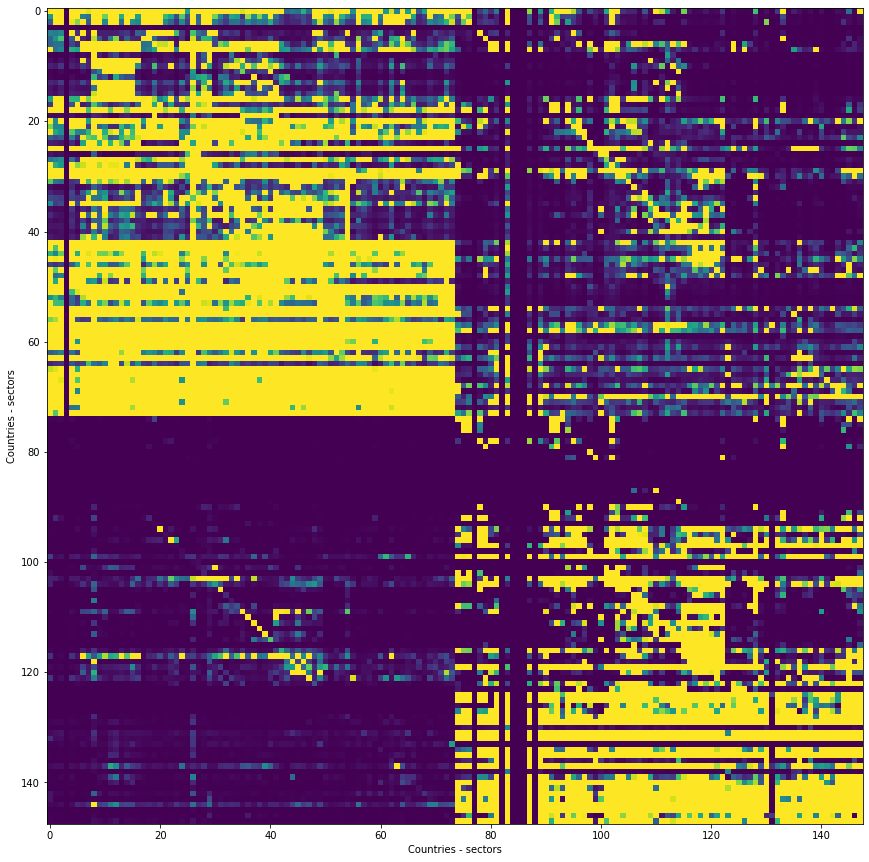

In [3]:
import matplotlib.pyplot as plt
import pickle as pkl
import pathlib

mrio_path = pathlib.Path("../../../Data/exio3_japan_ROW_20220215-165410.pkl")
with mrio_path.open('rb') as f:
    exio3 = pkl.load(f)

plt.figure(figsize=(15,15))
plt.imshow(exio3.A, vmax=1E-3)
plt.xlabel('Countries - sectors')
plt.ylabel('Countries - sectors')
plt.show()

In [7]:
np.count_nonzero(model.mrio.VA_0 < 0)

23

In [11]:
import pickle as pkl

with pathlib.Path("../../../Data/exio3_74sec_20220215-115159.pkl").open('rb') as f:
    mrio = pkl.load(f)

In [14]:
print(mrio)

IO System with parameters: Z, Y, x, unit, meta, satellite, IOT_2019_ixi, impacts
